In [1]:
import pandas as pd
import numpy as np

import sys
import os

from pathlib import Path
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import load_utils as lu

In [3]:
sr = 22050
length_2s = 2 * sr

In [4]:
orig_df = pd.read_csv(
    'D:/Programming/nn/emotion_classification/datasets/emofilm_uk_new_test_df.csv'
)
# orig_df = lu.load_and_scale(orig_df, length_2s, scale=False)
loaded_df = pd.read_csv('./features/features-test-uk-new-mel-v4.csv')


In [5]:
loaded = loaded_df.iloc[:, :-1].values
loaded = np.reshape(loaded, (len(loaded), 64, 64))

In [6]:
def print_mel(data, sample_rate):
    mel = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=1024, hop_length=690, n_mels=64)
    mel_spect = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_spect, sr=sr, x_axis='time')

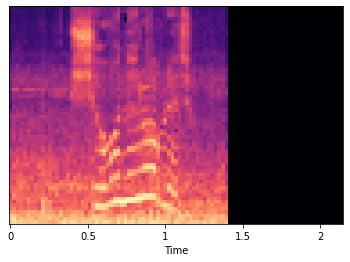

In [7]:
orig, sr = librosa.load(orig_df['path'][0])
a = librosa.util.fix_length(orig, size=length_2s)
print_mel(orig, sr)

In [8]:
Audio(orig, rate=22050)

In [29]:
# Transpose the array
transposed_arr = loaded.transpose((0, 2, 1))

# Print original and transposed arrays
print("Original array:\n", loaded.shape)
print("\nTransposed array:\n", transposed_arr.shape)

Original array:
 (41, 64, 64)

Transposed array:
 (41, 64, 64)


In [28]:
loaded.shape

(41, 64, 64)

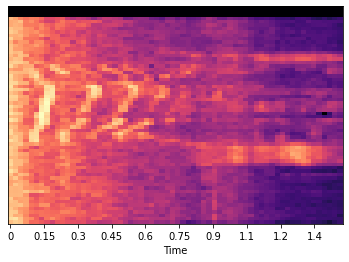

In [64]:
librosa.display.specshow(transposed_arr[0], sr=sr, x_axis='time')


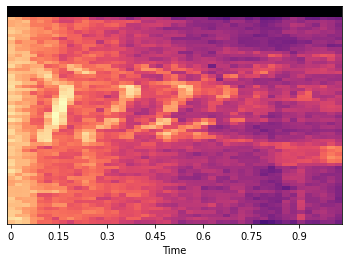

In [66]:

librosa.display.specshow(transposed_arr[0][:, :45], sr=sr, x_axis='time')

In [61]:
transposed_arr[0][:, :50].shape


(64, 50)

In [58]:

# Trim the last dimension to size 4 using slicing
trimmed_arr = arr[:, :, :4]  # Select all rows, all columns, and the first 4 elements of the last dimension

# Print original and trimmed arrays
print("Original array:\n", arr)
print("\nTrimmed array:\n", trimmed_arr)

(54, 64)